In [1]:
#%matplotlib notebook
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.stats as st

def gaussian_kernel(kernlen=21, sig=2.):
    '''defines a Gaussian kernel matrix'''
    x = np.linspace(-1., 1., kernlen+1)
    kern1d = st.norm.pdf(sig*x)
    kern2d = np.outer(kern1d, kern1d)              # outer product(x,y) = x @ y' , this is our trick for separable kernels
    return kern2d/kern2d.sum()

---
#### P1b: Window-based transforms, convolutions and kernels

---
<div class="alert alert-info">
<p>
University of Applied Sciences Munich<br>
Dept of Electrical Enineering and Information Technology<br>
Institute for Applications of Machine Learning and Intelligent Systems (IAMLIS)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(c) Alfred Schöttl 2024<br>
</p>
</div>

---
In this notebook, we will investigate convolutions and use them to sharpen to an image (by a so-called unsharp mask).

In [29]:
fn = './imgs/poppiesgray.jpg'

### 1. Read the image
Read in the image `img` as gray-scale image (use the option `cv2.IMREAD_GRAYSCALE`), rescale it to 0..1 and plot the result. You should see a slightly blurred image of a meadow.

In [30]:
img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Couldn't open image.")
img = img.astype(float)
img = img/np.max(img)

### 2. Blur the image
Start by defining a kernel for the linear filter. Let `kernel_size` be the width and height of the kernel. 

- Construct a kernel `kernel` with with equal entries first. Use `np.ones((kernel_size, kernel_size))` to create a matrix of ones. Print the values of the kernel. It may be helpful to use 

```
with np.printoptions(precision=3, suppress=True):
      print(kernel)
```

<ul style="list-style-type:none;"><li>to print out a matrix in a readable way.</li></ul>

- There is a function `gaussian_kernel` already defined for you. Try to understand its arguments by experimenting with it and printing out the the kernel values.

In [105]:
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size))/kernel_size**2
kernel_2 = 1/9*np.array([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1,-1,-1]])
kernel_2 /= 3**2
kernel_gauss = gaussian_kernel(5,7)
with np.printoptions(precision=3, suppress=True):
      print(kernel_2)

def disp_img(img, title = None):
    plt.imshow(img, cmap = "gray", vmax = 1)
    plt.axis(False)
    plt.title(title)
    plt.show()


[[-0.012 -0.012 -0.012]
 [-0.012  0.099 -0.012]
 [-0.012 -0.012 -0.012]]


Now use the OpenCV function `cv2.filter2D(img, -1, kernel)` to perform the convolution. Store the result in `img_mod` and display the result. Check if you obtained an image which is even more blurred.

Play with various kernel sizes and different kernel types.

_Remark_: The -1 in `filter2D` stands for: the result of the filtering has the same number of channels as the input.

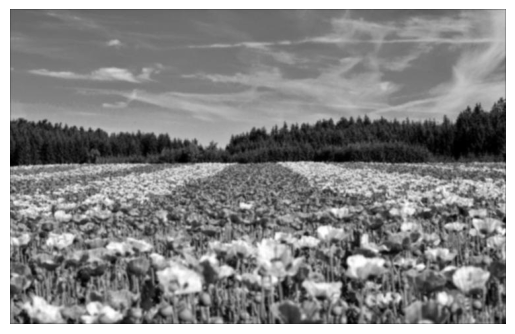

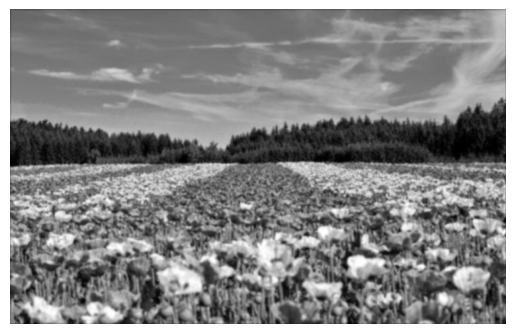

In [106]:
img_mod = cv2.filter2D(img, -1, kernel_gauss)
disp_img(img)
disp_img(img_mod)

### 3. Sharpen the image
A nice possibility to slightly sharpen an image is to apply an _unsharp mask_ (but don't expect too much!). The first step is to extract edges by considering the difference between the original image and the blurred image. Take the absolute value (use `np.abs`) of the image difference and scale it appropriately (multiply it by a constant) so that you can see the edges clearly. Clip the result to 0..1 and store it in the image `edges`.

(476, 750)


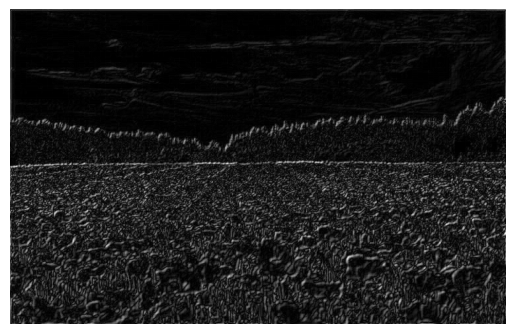

In [107]:
print(np.shape(img))
v = 5
edges = np.clip((np.abs((img - img_mod))*v),0,1)#/np.max(np.abs((img - img_mod))*v)
disp_img(edges)
#print(edges)

Now combine the edges and the original image linearly, play with different factors and kernel sizes. Store the result in `res`. The resulting image should look a little sharper than the original (not only the blurred!) one.

_Tip:_ You may enlarge a Jupyter matplotlib plot by `plt.subplots(figsize=(18,12))` in front of `imshow` to see the details.

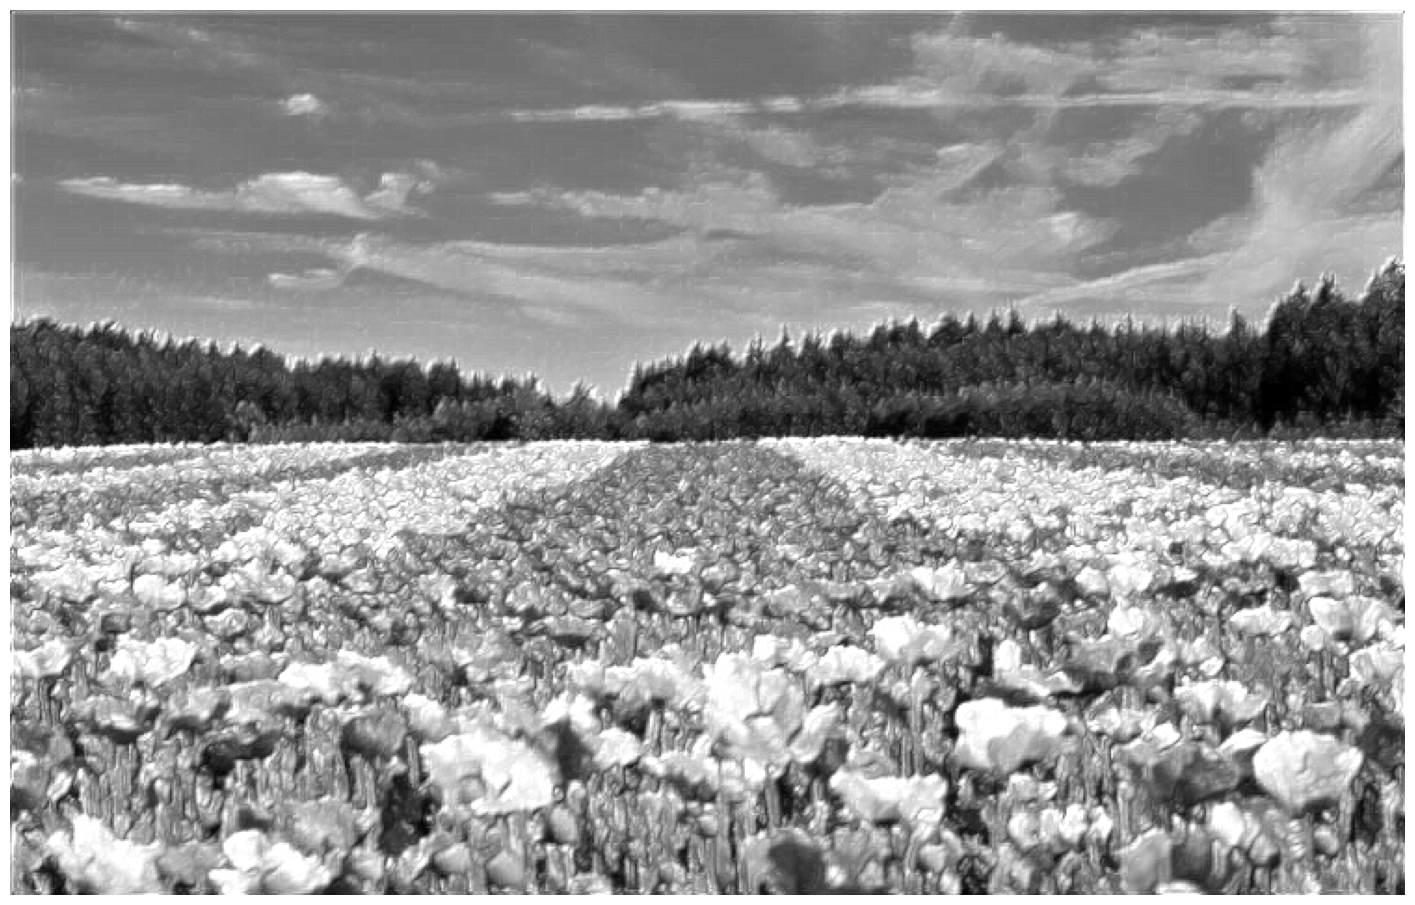

In [108]:
res = img + edges
res = np.clip(res, 0, 1)
plt.subplots(figsize=(18,12))
disp_img(res)
